# Data Analysis Project

## Investigating the Titanic Dataset


### Questions:

1. What factors made people more likely to survive?

2. Was it better to be a Female  or Male  on the Titanic?

3. Where the More prestigious passengers given a chnace to get of first?

4. Where children more or less likely to survive the disaster?



### Exploring the data

In [72]:
## Importing all libraries at the start
import scipy.stats
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
sns.set_style('whitegrid')
%matplotlib inline
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [22]:
## Import the titanic data from csv as a dataframe
titanic_df = pd.read_csv('U:/TASKS/Data_Analytics/Data_Analysis/Titanic_data/__MACOSX/Titanic_data/titanic-data.csv')

##titanic_df = pd.read_csv('/Users/tobikasali/Documents/datascience/data_analytics/Titanic_data/titanic-data.csv')

## Take a quick look at the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
print titanic_df.dtypes



PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [24]:
## Get the number of rows of data that we have
titanic_df.shape 

(891, 12)

In [25]:
##Check the number of survivors

titanic_df['Survived'].sum()

342L

In [26]:
##Check if there are any Columns with Nan or Null data
pd.isnull(titanic_df).any() ## Returns Columns within the dataframe that have nan values



PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

We can see here that some variables do have Null values, therefore we'll have to deal with the Null values before perfroming any analysis with those variables.

##  Interesting Variables

Looking at the data,  I am very interested in the Age, Sex and PClass variables and how these are factors that affected surviing the disaster; parly due to anecdotal evidence of how people were chosen to get on lifeboats on the Titanic.

##### The Independent Variables are:

*  Gender
*  Pclass
*  Age

##### The Dependent Variable is:

*  Survived




### Analysis of factors

#### 1. Gender

The first variabe I am interested in is Gender. Was it better  to be a Male or Female on the titanic? Were Women more likely to survive than Men? Let's find out!

In [27]:
## Check the total number of Males and Females on the titanic.

titanic_df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [28]:
## Filter out the Columns needed to look at Gender based survival

Survived_Gender = titanic_df[['Survived','Sex']]
Survived_Gender.head()

,Survived,Sex
0,0,male
1,1,female
2,1,female
3,1,female
4,0,male


In [29]:
## Group the number of Survivors by Gender so we can see the number of Survivors per gender.

SG_group = Survived_Gender.groupby('Sex')

In [30]:
##find the number of survivors by Gender

SG_sum = SG_group.sum()
SG_sum.head()

,Survived
Sex,
female,233
male,109


In [31]:
## Get the total number of Males and Females and rename the column to totals

SG_counts= pd.DataFrame(titanic_df.groupby('Sex').size().rename('Totals'))

SG_counts.head()

,Totals
Sex,
female,314
male,577


Looking at these figures, there were clearly more Men than Women, however, the number of males who survived was much lower than female

In [32]:
#Merge the two dataframes so we can compare the number of survivors per gender to the total number for each Gender

SG_totals = pd.concat([SG_sum, SG_counts], axis=1, join_axes=[SG_sum.index])

print SG_totals



        Survived  Totals
Sex                     
female       233     314
male         109     577


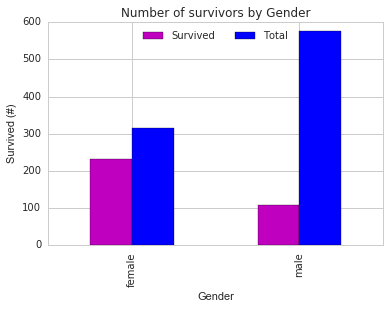

In [33]:
## Create a bar chart for the Survived Gender data

my_gender_plot = SG_totals.plot(kind='bar', legend=None, title="Number of survivors by Gender", color= ['m', 'b'])
my_gender_plot.set_xlabel("Gender")
my_gender_plot.set_ylabel("Survived (#)")
my_gender_plot.legend(["Survived","Total"], loc=9,ncol=3)
my_gender_plot

This Bar chart shows the number of females and males that survived compared to the total number of males and females in our dataset. 

Looking at this, it is clear that a higher percentage of women survived than Men; at least over 50%. To get precise figures, we can calculate survival percetnage for each Gender.

In [34]:
## Create a function to get the survival percentage for each group of data

def Percentage_survivors(group_totals):
    group_totals['Survival Percentage'] = (group_totals['Survived'].div(group_totals['Totals']) * 100)
    return group_totals


In [35]:
## The Percnetage of survivors for each Gender

SG_Percentage = Percentage_survivors(SG_totals)

print SG_Percentage

        Survived  Totals  Survival Percentage
Sex                                          
female       233     314            74.203822
male         109     577            18.890815


The survival percentage calculated above shows that women were 4 times more likely to survive than Men... 

We'll take a closer look with Statistics

In [36]:
SG_group.mean()


,Survived
Sex,
female,0.742038
male,0.188908


The mean(s) above shows us what we already suspected about women being 4 times more likely to survive than Men.

The formilar for the Z test is:

<img src="two-proprtion-z-test.png">




Step 1: Find the two proportions:

* P1 = 233/314 = 0.74 (that’s 74%)
* P2 = 109/577 = 0.18 (that’s 18%).


Step 2: Find the overall sample proportion. The numerator will be the total number of Survivors for both Males and Females and the denominator is the total number of Males and Females..


* p = (233 + 109) / (314 + 577) = 0.38

<img src="Z_score_calculation_gender.PNG">

Solving the formula, we get:


Z = 18.6

The p-value is 0. The result is significant at p <0.05. 

18.6 > 1.96, so we can reject the null hypothesis that there is no difference in the rates/proportion of survival between Females and Males.



III. Conclusion

With a P value less than 0.05,  survival for females represents a statistically significant difference to the rate of  male survival.

Although the 891 number of people here is a sample of the popluation of Survivors, The P value is low enough that I am willing to take a chance that the rate of survival for women is higher than men for the whole popluation on the titanic.

I would say though  that I believe that the Culture of putting Women and Children first on Life boats could have accounted for this behavoir.

#### PClass - This is the Passenger Class - 

There are 3 classes represented here and it is believed that they represent the following:

1 - First Class
2 - Second Class
3 - Third Class

Would there be a difference in the rate of survival for these 3 class? if so, what could account for this? Promixity to the Life boats? Preference to 1st Class passengers?

As we did before, we will start by extracting the columns we need.

In [37]:
#### Filter out the Columns needed to look at Passenger Class based survival

Survived_Pclass = titanic_df[['Survived','Pclass']]
Survived_Pclass.head()                         
                           

,Survived,Pclass
0,0,3
1,1,1
2,1,3
3,1,1
4,0,3


In [39]:
### Group by Passenger class so we can see the number of survivors in each class

SP_group = Survived_Pclass.groupby(['Pclass'])


In [40]:
SP_sum = SP_group.sum()
SP_sum.head()

,Survived
Pclass,
1,136
2,87
3,119


Looking at these numbers, Pclass 1 and 3 have a similar number of survivors with Pclass2 a little behind, it appears that there might have not been much difference between the classes in terms of surviving the disaster

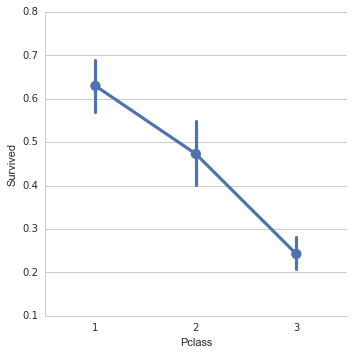

In [38]:
# Have a look at the a visualation of the Pclass data with group survivors..
sns.factorplot('Pclass','Survived',order=[1,2,3], data=Survived_Pclass,size=5)

However, the visualisation above indicates that there's a much bigger difference than the number of survivors suggest. It would be better if we compared the number of survivors to the actual number of people who were in each class; This would give us a more accurate picture of survivors in each Class

In [41]:
## Get the total number of passengers in each Class - This will enable us get a proportion of people who survived in each class

SP_counts = pd.DataFrame(titanic_df.groupby('Pclass').size().rename('Totals'))

SP_counts.head()

,Totals
Pclass,
1,216
2,184
3,491


In [42]:
#Merge the two dataframes so we can compare the number of survivors per gender to the total number for people that were in each Class

SP_totals = pd.concat([SP_sum, SP_counts], axis=1, join_axes=[SP_sum.index])

print SP_totals

        Survived  Totals
Pclass                  
1            136     216
2             87     184
3            119     491


Populating the interactive namespace from numpy and matplotlib


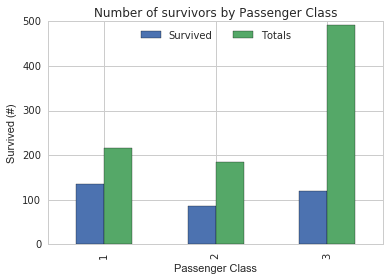

In [43]:
## Create a bar chart for the Passenger Class Data

%pylab inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

my_Pclass_plot = SP_totals.plot(kind='bar', legend=None, title="Number of survivors by Passenger Class")
my_Pclass_plot.set_xlabel("Passenger Class")
my_Pclass_plot.set_ylabel("Survived (#)")
my_Pclass_plot.legend(["Survived","Totals"], loc=9,ncol=3)
my_Pclass_plot

The bar chart shows that although the number of survivors in each class is similar, the difference between the number of survivors and the total number of people in the class is much different - The most glaring difference is in the 3rd class, there were far more people in that class (more than twice as many as first class) and it didn't even have the highest number of survivors!

We'll calulate the percnatge of survivors to the total number of people in the class below to get actual figures:

In [44]:
## Have a Look at the survival percentage of each Passenger Class

SP_Percentage = Percentage_survivors(SP_totals)

print SP_Percentage

        Survived  Totals  Survival Percentage
Pclass                                       
1            136     216            62.962963
2             87     184            47.282609
3            119     491            24.236253


From the above calcluations, more than half of the people in first class survived, while less than a thrid of people in 3rd class survived. 

It appears that we have a higher percentage of People surviving in First Class; with the lowest in 3rd clas but do these differences represent a significant satistical difference? Let's take a look.


In [45]:
## Find the Average rate of survival for each Class
SP_group.mean()


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [76]:
1.	Statistical Test

The Chi-Swquare test for two population proportions is used when we want to know whether two population proportions (in our case Females and Males) differ significantly from  one another on some categorical variable (Survival). 

2. Hypothesis:

H0: Passenger Class and Surviving are Independent

H1: Passenger Class and Surviving are  not Independent (there is some correlation between passenger Class and Surviving)

To perform the tests, i'll use the following conditions:

  	significance level α=0.05
    Confidence Level of 95%
    Sample size=891
    df= (2-1)(3-1)= 2

The Critical value and Rejection Region:

For α=0.05, 
 
     Rejection region: x2 > 5.9914
            
            
            
Using a contigency Table:
    
    



SyntaxError: invalid syntax (<ipython-input-76-82286bb41b08>, line 1)

In [ ]:
import scipy.stats

survival = [ [ 136, 87,119 ], [ 80, 97,372 ] ]
chi2, p, ddof, expected = scipy.stats.chi2_contingency( survival )
msg = "Test Statistic: {}\np-value: {}\nDegrees of Freedom: {}\n"
print( msg.format( chi2, p, ddof ) )
print( expected )

I. Hypothesis:

Null Hypothesis: There is no difference between the mean of survivors from the different Passenger classes.

Alternative Hypothesis: There is a difference in means in the survivors from different classes.



II.	Statistical Test

The analysis of variance or ANOVA is a statistical inference test that lets you compare multiple groups at the same time.

To perform the tests, i'll use the following conditions:

  	significance level α=0.01
    Confidence Level of 99%
    

The Critical value and Rejection Region:

For α=0.01, df1=2, df2=888

    F: 4.605
    Rejection region: F > 4.606
    





In [46]:
# Extract individual groups 

import matplotlib.pyplot as plt
import scipy.stats as stats

FirstClass =  Survived_Pclass[Survived_Pclass['Pclass'] == 1]
SecondClass = Survived_Pclass[Survived_Pclass['Pclass'] ==  2]
ThirdClass  = Survived_Pclass[Survived_Pclass['Pclass'] ==  3]

# Perform the ANOVA
stats.f_oneway(FirstClass['Survived'], SecondClass['Survived'],ThirdClass['Survived'])







F_onewayResult(statistic=57.964817590910116, pvalue=2.1832474151179777e-24)

Calculated Values:

data:  Survived and Pclass
F = 57.9648, num df = 2, denom df = 888,  pvalue=2.1832474151179777e-24)


The test output yields an F-statistic of  57.9648 and a p-value of pvalue=2.1832474151179777e-24, indicating that there is a significant difference between the means of each group.


We don't know which group(s) caused the the  positive result. To check which groups differ after getting a positive ANOVA result, I will perform  a follow up test or "post-hoc test".




group1,group2,meandiff,lower,upper,reject
1,2,-0.1568,-0.2647,-0.0489,True
1,3,-0.3873,-0.4751,-0.2994,True
2,3,-0.2305,-0.3234,-0.1375,True


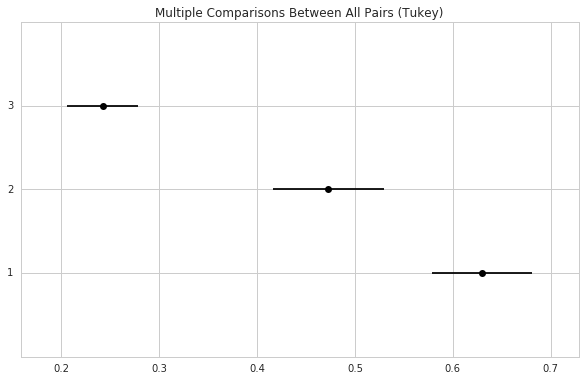

In [47]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=Survived_Pclass['Survived'],     # Data
                          groups=Survived_Pclass['Pclass'],  # Groups
                          alpha=0.05)          # Significance level

tukey.plot_simultaneous()    # Plot group confidence intervals
plt.vlines(x=49.57,ymin=-0.5,ymax=4.5, color="red")

tukey.summary()              # See test summary

III. Conclusion

The Test suggests that we reject the Null hypothesis for all 3 pairs. However, there is a more signficant difference between Classes 1 and 3. 

It appears that a passenger was more likely to survive being in First Class than in Third class. First Class passengers were most likely the wealthiest on board and would have had been given first access to Lifeboats

##### Age

I'm going to look at Age and try to divide into two major groups. Under 18 and Over 18 ;Everyone under 18's can be classified as a child. I can then check if there were any differences between Adults and Children Surviving.



In [48]:
##Check if there are any Columns with Nan or Null data
pd.isnull(titanic_df).any() ## Returns Columns within the dataframe that have nan values



PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

The check above shows that there are null values in the  Age column, therefore, before any analysis can be done using Age as a variable, the rows which don't have any Age values will be removed.



In [49]:
## Returns the number of rows in a particaular colum that has Nan Values

print titanic_df['Age'].isnull().sum() 

177


There are 177 rows with missing values so these rows will be removed from the Data frame.

In [50]:
# I'm going to use a copy of the data set from the titanic_df and I don't want the SettingWithCopyWarning

pd.options.mode.chained_assignment = None  # default='warn'

## Subset Titanic data - removing rows that don't have an age value.  

clean_age_titanic_df = titanic_df[titanic_df['Age'].notnull()]

## Change the Age values from float to Integers

clean_age_titanic_df.Age = clean_age_titanic_df.Age.astype(int)



##clean_age_titanic_df.head()

clean_age_titanic_df.count()

PassengerId    714
Survived       714
Pclass         714
Name           714
Sex            714
Age            714
SibSp          714
Parch          714
Ticket         714
Fare           714
Cabin          185
Embarked       712
dtype: int64

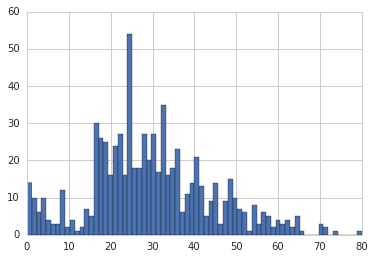

In [51]:
## A histogram to visualise the distribution of Age data

clean_age_titanic_df['Age'].hist(bins=70)

There seems to be a tight cluster of Taller bins between the ages of 15 and 35 ; This shows that most people in our sample fall between these ages. At another time, I could compare this age group with the others maybe 35 and over and 15 and under but for this project I will stick to Under 18's as children and over 18's as Adults.

In [52]:
## To get the 18's and above, I'll create a logical Test for each Age value to determine whether it's over 18's or Under 18's.

pd.options.mode.chained_assignment = None  # default='warn'

clean_age_titanic_df['Age_Class'] = clean_age_titanic_df.Age < 18







In [53]:
## Preview the data
##True Indicates Yes - Age is under 18 and False - Indicates No, Age is over 18

clean_age_titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,False


In [54]:
## I can now change all True values which represent people under 18 to Child and all False values who represent people over 
## 18 to Adult.

clean_age_titanic_df['Age_Class'] = np.where(clean_age_titanic_df['Age_Class'] ==  True, 'Child', 'Adult')

In [55]:
## Preview the data and it looks as expected

clean_age_titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_Class
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,Adult


In [56]:
## Get the columns we are intersted in.

Survived_Age = clean_age_titanic_df[['Survived','Age_Class']]
Survived_Age.head()

,Survived,Age_Class
0,0,Adult
1,1,Adult
2,1,Adult
3,1,Adult
4,0,Adult


In [57]:
### Group by the Age_class column - 

SA_group = Survived_Age.groupby(['Age_Class'])

In [58]:
## get the number of survivors that are children or Adults

SA_sum = SA_group.sum()
SA_sum.head()




,Survived
Age_Class,
Adult,229
Child,61


In [59]:
##The total number of passengers which are children or Adults

## The Age counts are reduced because the Nan Values have been removed.

SA_counts = pd.DataFrame(clean_age_titanic_df.groupby('Age_Class').size().rename('Totals'))


print SA_counts

           Totals
Age_Class        
Adult         601
Child         113


In [60]:
#Merge the two dataframes so we can compare the number of survivors in each Age groupto the total number of people in each group. 

SA_totals = pd.concat([SA_sum, SA_counts], axis=1, join_axes=[SA_sum.index])

print SA_totals

           Survived  Totals
Age_Class                  
Adult           229     601
Child            61     113


Populating the interactive namespace from numpy and matplotlib


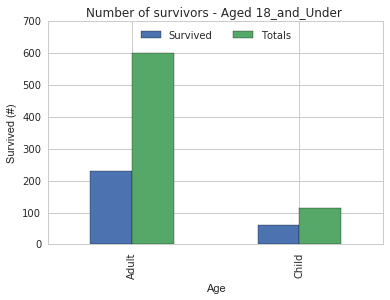

In [61]:
## Create a bar chart for the Age group Data

%pylab inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

my_Age_plot = SA_totals.plot(kind='bar', legend=None, title="Number of survivors - Aged 18_and_Under ")
my_Age_plot.set_xlabel("Age")
my_Age_plot.set_ylabel("Survived (#)")
my_Age_plot.legend(["Survived","Totals"], loc=9,ncol=3)
my_Age_plot

In [62]:
## Have a Look at the survival percentage of Under 18's compared to Over 18's.

SA_Percentage = Percentage_survivors(SA_totals)

print SA_Percentage




           Survived  Totals  Survival Percentage
Age_Class                                       
Adult           229     601            38.103161
Child            61     113            53.982301


Populating the interactive namespace from numpy and matplotlib


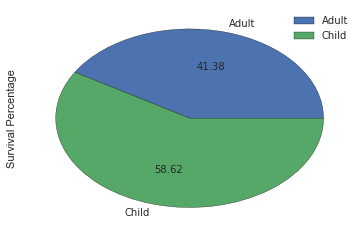

In [63]:
## Create a Pie Chart to for the Survival Percnetage

%pylab inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

SA_Percentage.plot.pie(labels=['Adult', 'Child'],y= "Survival Percentage", figsize=(6, 4), autopct='%.2f', fontsize=10)

In [64]:
print SA_group.mean()

           Survived
Age_Class          
Adult      0.381032
Child      0.539823


##### Hypothesis:

We want to Test the Hypothesis that it was better to be a Child on the Titanic than an Adult when it came to chances of Survival.


I. Statistical Test

The Z-test for two population proportions is used when we want to know whether two population proportions (in our case Females and Males) differ significantly from  one another on some categorical variable (Survival).


Null Hypothesis: There is no difference between the percentage of Adult survivals to that of Child survival.

Alternative Hypothesis: There is a difference between the percentage of Adult survival and Child Survival.


H0: pC - pA = 0 ("the difference between the percentages is equal to 0")
H1: pC - pA ≠ 0 ("the difference between the percentages is not equal to 0") i.e there is a difference between them.



pC is the perctange of Child Survivors
pA is the percentage of Adult survivors.


To perform the tests, i'll use the following conditions:

  	significance level α=0.05
    Confidence Level of 95%
    Sample size=891

The Critical value and Rejection Region:

For α=0.05, 

     Rejection region: Z > 1.96

The formular for the Z test is:

<img src="two-proprtion-z-test.png">




Step 1: Find the two proportions:

* PC = 61/113  = 0.54 (that’s 54%).
* pA = 229/601 = 0.38 (that’s 38%)



Step 2: Find the overall sample proportion. The numerator will be the total number of Survivors for both Adults and Males and the denominator is the total number of Adults and Males..


* p = (229 + 61) / (601 + 113) = 0.40

<img src="Z_score_calculation_Age.PNG">

Solving the formula, we get:


Z = 3.153

The p-value is 0.00164. The result is significant at p <0.05. 

3.153 > 1.96, so we can reject the null hypothesis that there is no difference in the rates/proportion of survival between Adults and Children.



III. Conclusion

With a P value less than 0.05, survival for children represents a statistically significant difference to the rate of Adult survival.

I believe that the Women and Children first on Life boats could have accounted for this behavoir. While one would assume that it might have been tougher for a child to survive on the Titanic, a bigger percnetage of children survived. this might have been due to Parents giving up thier places for their children 

##### Gender and Pclass

Two variable comparison - Pclass and Gender

In [67]:
#### Filter out the Columns needed to look at Passenger Class and Gender based survival together

Survived_group = titanic_df[['Survived','Pclass','Sex']]
Survived_group.head()          

,Survived,Pclass,Sex
0,0,3,male
1,1,1,female
2,1,3,female
3,1,1,female
4,0,3,male


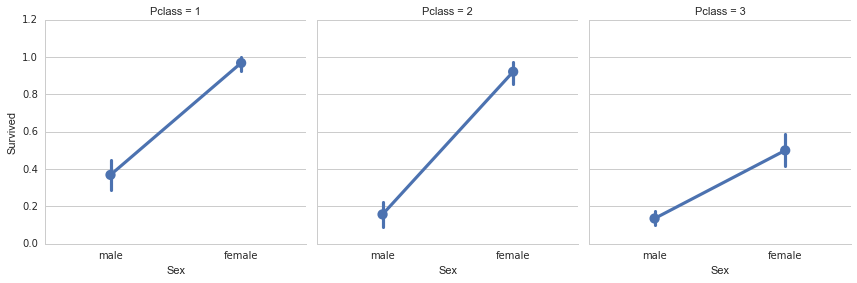

In [68]:
sns.factorplot(data=Survived_group, x="Sex", y="Survived", col="Pclass")  

In [ ]:
## Group the number of survivors by Passenger Class and Gender

Survived_cat = Survived_group.groupby(['Pclass','Sex']).sum()
Survived_cat.head()

In [ ]:
Survived_cat.unstack().head()

In [ ]:
## Use a plot to visually inspect the data

my_double_plot = Survived_cat.unstack().plot(kind='bar',stacked=True, title="Number of Survivors", figsize=(6, 6), color=['m', 'b'])
my_double_plot.set_xlabel("Pclass")
my_double_plot.set_ylabel("Survivors (#)")
my_double_plot.legend(["female","male"], loc=9,ncol=3)


In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols


s_group_lm=ols('Survived ~ C(Sex) * C(Pclass)', data=Survived_group).fit() #Specify C for Categorical
print(sm.stats.anova_lm(s_group_lm, typ=2))

We have strong evidence here that there are differences between the three Passenger classes, between the 2 genders and that there is an interaction between Gender and Passenger Class. 



#### Conclusion


The dataset used is a subset of the data - with 891 observations and there were 2224 passengers on the titanic. Some of the variable might be over -represented in this sample data that we have.

For example, we could have had more survivors in First Class (Pclass) in this sample data then we had for Third Class; This would affect any analysis or conclusions that are made.



In Sum, we can see that being a female and being in First class was very good survival. Additionally, being Under 18 was also very  good for suvival on the titanic. As we know that correlation does not equal causation, I can only advise that next time you're on an 'Unsinkable' ship,if you're female and Under 18, relax and enjoy the trip but if you're Male, buy a First Class Ticket!


Having Looked at the Variables in this dataset, I would be further interested in analysing the follwing variables to investgate the impact having a Large family or being part of a family could have on Survival,

sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard

Resources

http://www.socscistatistics.com/tests/ztest/
    
    